In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import calendar

In [2]:
crime_data_to_load = Path("../project1/Resources/crime_grouped_data.csv")
crime_data = pd.read_csv(crime_data_to_load)

## Number of Crimes by Month

In [3]:
crime_data["Date Reported"] = pd.to_datetime(crime_data["Date Reported"])
crime_data["Date Occurred"] = pd.to_datetime(crime_data["Date Occurred"])

crime_data["Month Occurred"] = crime_data["Date Occurred"].dt.month

In [4]:
crime_by_month = crime_data.groupby("Month Occurred").size()
crime_by_month

Month Occurred
1     72860
2     68515
3     71005
4     70028
5     72973
6     72350
7     73939
8     58256
9     53163
10    55953
11    52482
12    53657
dtype: int64

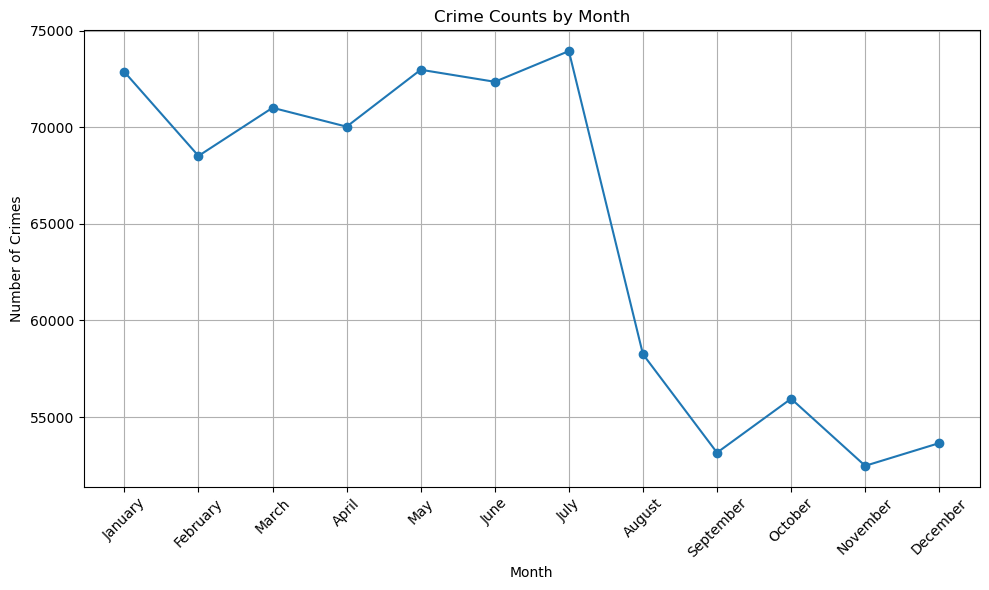

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(crime_by_month.index, crime_by_month.values, marker='o')

plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Month")
plt.grid(True)

month_names = [calendar.month_name[i] for i in crime_by_month.index]
plt.xticks(crime_by_month.index, month_names, rotation=45)

plt.tight_layout() 
plt.show()

## Number of Crimes by Hour

In [6]:
crime_byhour = crime_data.groupby("Crime Code Category")["Hour Occurred"].value_counts()

crime_byhour_df = crime_byhour.unstack(level=0)
crime_byhour_df

Crime Code Category,Assault/Violent Crimes,Burglary/ Theft,Crimes Against Minors,Firearms/Weapons,Public Order,Sexually Motivated Crimes,Theft of Identity,Vandalism,Vehicle Crimes,Violations,White Collar Crimes
Hour Occurred,,,,,,,,,,,
00:00 to 01:00,9691,12311,554,807,605,1731,5920,3766,4308,602,396
01:00 to 02:00,6404,7561,111,581,447,542,1122,2372,2273,334,110
02:00 to 03:00,4947,7210,75,479,368,467,621,2143,1907,240,78
03:00 to 04:00,3356,6913,66,335,319,325,478,1786,1664,218,70
04:00 to 05:00,2777,6446,62,268,281,244,484,1496,1761,222,72
05:00 to 06:00,2627,6078,140,245,296,357,1255,1710,2218,255,98
06:00 to 07:00,3368,6119,181,267,447,408,2895,1787,2495,383,166
07:00 to 08:00,5085,8813,400,400,638,688,3222,2317,2942,658,363
08:00 to 09:00,6206,8954,285,512,705,576,2768,2575,2650,740,391


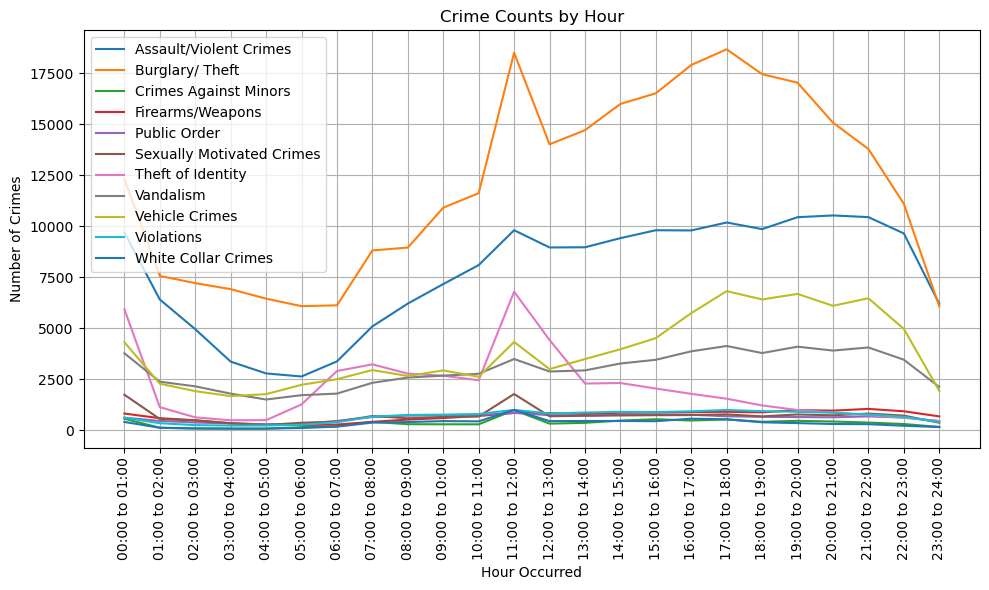

In [7]:
plt.figure(figsize=(10, 6))

for column in crime_byhour_df.columns:
    plt.plot(crime_byhour_df.index, crime_byhour_df[column], label=column)

plt.xlabel("Hour Occurred")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Hour")
plt.legend()
plt.grid(True)

plt.xticks(rotation=90)
plt.tight_layout()  

## Number of Crimes by Crime Code Category

In [8]:
crime_category_count = crime_data["Crime Code Category"].value_counts().sort_values(ascending=False)
crime_category_count

Burglary/ Theft              289880
Assault/Violent Crimes       183773
Vehicle Crimes                92112
Vandalism                     70736
Theft of Identity             49830
Sexually Motivated Crimes     16756
Firearms/Weapons              16520
Violations                    15994
Public Order                  14408
Crimes Against Minors          8131
White Collar Crimes            8086
Name: Crime Code Category, dtype: int64

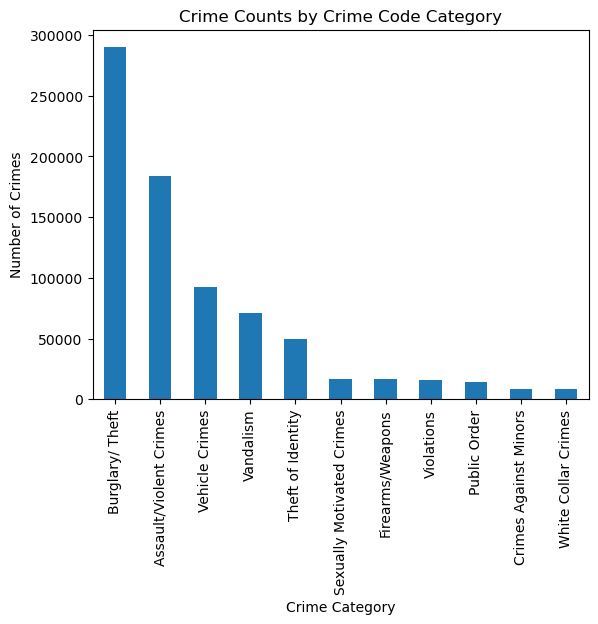

In [9]:
crime_category_chart = crime_category_count.plot(kind='bar')

plt.xlabel("Crime Category")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Crime Code Category")

plt.show()

## Nuber of Crimes by Premise Category

In [10]:
premise_count = crime_data["Premise Category"].value_counts().sort_values(ascending=False)
premise_count

Outdoor Locations       351026
Residential             241346
Commercial Locations    122123
Transportation           34292
Public Facilities        17491
Miscellaneous             8447
Name: Premise Category, dtype: int64

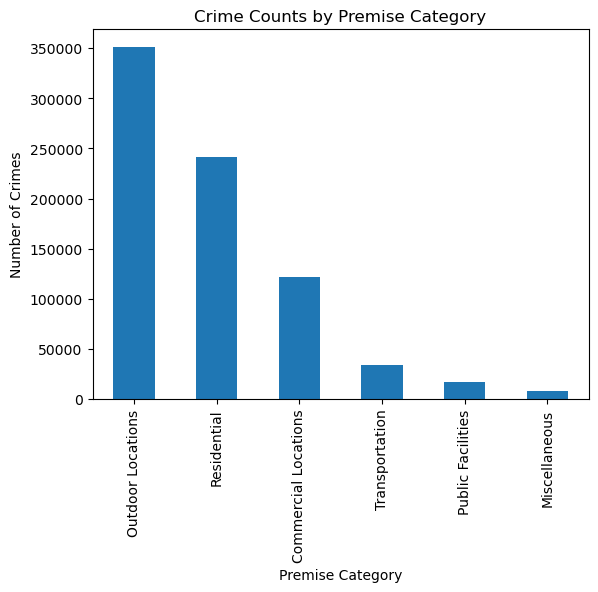

In [11]:
premise_chart = premise_count.plot(kind='bar')

plt.xlabel("Premise Category")
plt.ylabel("Number of Crimes")
plt.title("Crime Counts by Premise Category")

plt.show()

## Victims by Age Range

In [12]:
victim_age_range = crime_data["Victim Age Range"].value_counts()
victim_age_range

26-45    286790
<18      214965
46-65    149548
18-25     84563
>65       39315
Name: Victim Age Range, dtype: int64

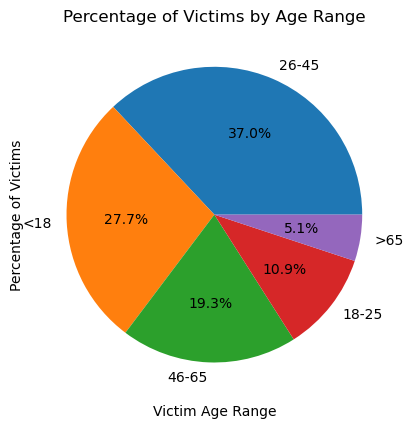

In [13]:
age_chart = victim_age_range.plot(kind='pie', autopct="%1.1f%%")

plt.xlabel("Victim Age Range")
plt.ylabel("Percentage of Victims")
plt.title("Percentage of Victims by Age Range")

plt.show()

## Victims by Ethnicity

In [14]:
victim_ethnicity = crime_data["Victim Ethnicity"].value_counts().sort_values(ascending=False)
victim_ethnicity

Hispanic/Latin/Mexican            237986
White                             158814
Black                             111119
Unknown                            73749
Other                              61418
Other Asian                        16926
Korean                              4124
Filipino                            3196
Chinese                             2925
Japanese                            1081
Vietnamese                           780
American Indian/Alaskan Native       742
Asian Indian                         387
Pacific Islander                     210
Hawaiian                             161
Cambodian                             54
Guamanian                             51
Laotian                               47
Samoan                                44
Name: Victim Ethnicity, dtype: int64

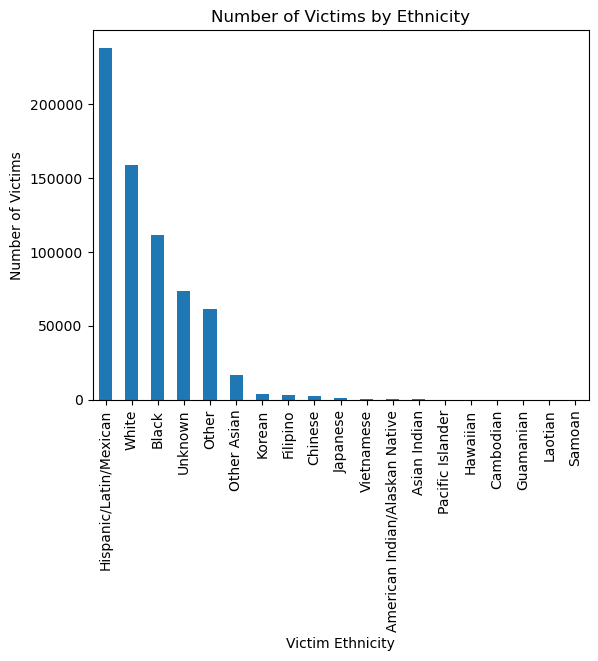

In [15]:
ethnicity_chart = victim_ethnicity.plot(kind='bar')

plt.xlabel("Victim Ethnicity")
plt.ylabel("Number of Victims")
plt.title("Number of Victims by Ethnicity")

plt.show()


## Victim by Sex

In [16]:
victim_sex = crime_data["Victim Sex"].value_counts().sort_values(ascending=False)
victim_sex


Male       320994
Female     286216
Unknown     66612
Name: Victim Sex, dtype: int64

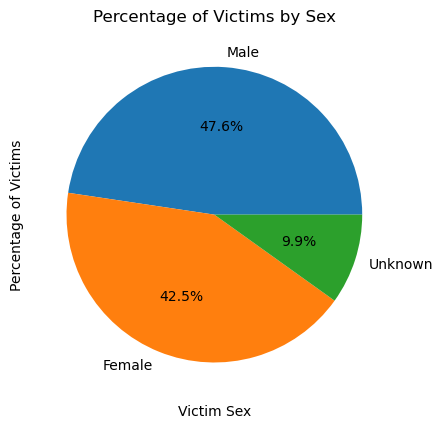

In [17]:
sex_chart = victim_sex.plot(kind='pie', autopct="%1.1f%%")

plt.xlabel("Victim Sex")
plt.ylabel("Percentage of Victims")
plt.title("Percentage of Victims by Sex")

plt.show()